In [8]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

columns = ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Extracurricular_Activities', 'Sleep_Hours',
           'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income',
           'School_Type', 'Peer_Influence', 'Physical_Activity', 'Distance_from_Home', 'Gender', 'Exam_Score']

# სათითაოდ მოითხოვს ყველა სვეტის მნიშვნელობას და ამატებს ბაზაში.
# ცარიელი სტრინგის შემთხვევაში ტოვებს NULL მნიშვნელობას.
def add_entry():
    print('Press Enter to leave blank')
    inputs = []
    for each in columns:
        value = input(each+': ')
        if value == '':
            value = None
        elif value.isnumeric():
            value = int(value)
        inputs.append(value)
    inputs = tuple(inputs)
    cursor.execute('''INSERT INTO data_table (Hours_Studied, Attendance, Parental_Involvement, Extracurricular_Activities, 
    Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, School_Type, 
    Peer_Influence, Physical_Activity, Distance_from_Home, Gender, Exam_Score) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)''', inputs)
    connection.commit()
    print('Entry Added!')


# მოითხოვს პარამეტრებს სათითაოდ და განახორციელებს ცვლილებას.
# ცარიელი სტრინგის შემთხვევაში სვეტს ტოვებს უცვლელს.
def update_entry():
    updated_columns = []
    new_values = []
    update_id = input('Enter The ID of the entry you want to update: ')
    print('Enter updated value or leave blank.')
    for each in columns:
        value = input(f'{each}: ')
        if value == '':
            continue
        else:
            updated_columns.append(each)
            if value.isnumeric():
                value = int(value)
            new_values.append(value)

    if len(updated_columns) == 1:
        updated_columns = updated_columns[0]
    else:
        updated_columns = tuple(updated_columns)
    if len(new_values) == 1:
        new_values = new_values[0]
    else:
        new_values = tuple(new_values)
    cursor.execute(f'UPDATE data_table SET {updated_columns}={new_values} WHERE ID={update_id}')
    connection.commit()
    print('Entry Updated!')


# მოითხოვს ID-ს და შლის ჩანაწერს.
def delete_entry():
    delete_id = input('Enter The ID of the entry you want to delete: ')
    cursor.execute(f'DELETE FROM data_table WHERE ID = {delete_id}')
    connection.commit()
    print('Entry Deleted!')


connection = sqlite3.connect('student_db.sqlite')
cursor = connection.cursor()

# აგებს Pie გრაფას სტუდენტთა კოლის ტიპის მიხედვით.
def school_type():
    private_count = tuple(cursor.execute('SELECT count(*) FROM data_table WHERE School_Type = "Private"'))[0][0]
    public_count = tuple(cursor.execute('SELECT count(*) FROM data_table WHERE School_Type = "Public"'))[0][0]

    labels = 'Private', 'Public'
    sizes = [private_count, public_count]

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title('Private and Public Schools Comparison')
    plt.show()

# აგებს Bar ტიპის დიაგრამას სტუდენტთა რაოდენობების მიხედვით, განაწილებული კვირაში ნამეცადინები საათებით.
def hours_studied_count():
    df = pd.read_sql_query('SELECT * FROM data_table', connection)
    plt.figure(figsize=(12, 5))
    sns.countplot(df, x='Hours_Studied')
    plt.title('Count of Students by Hours Studied')
    plt.show()

# აგებს plot-ს საშუალო ქულების მიხედვით, გაყოფილი რეპეტიტორთან მომზადების დღეებით.
def avg_scores_by_sleep():
    x_points = [i for i in range(8)]
    temp = []
    y_values = []
    for i in range(8):
        for k in cursor.execute(f'SELECT * FROM data_table WHERE Tutoring_Sessions = {i}').fetchall():
            temp.append(k[16])
        y_values.append(sum(temp)/len(temp))
        temp = []

    plt.plot(x_points, y_values, 'o-')
    plt.xticks(x_points)
    plt.title('Average Exam Scores by Tutoring Sessions')
    plt.show()


In [9]:
# აბრუნებს იმ ჩანაწერთა სიას, რომლებშიც საგამოცდო ქულა არის >= 90-ზე.
df = pd.read_sql_query('SELECT * FROM data_table WHERE Exam_Score >= 90', connection)
print(df)

      ID  Hours_Studied  Attendance Parental_Involvement  \
0     95             18          89                 High   
1    530             15          83               Medium   
2    771             24          96                  Low   
3    837             29          76               Medium   
4    920             21          74                 High   
5   1110             31          69               Medium   
6   1526             27          98                  Low   
7   2293             21          70                 High   
8   2426             23          83                 High   
9   3125             19          90               Medium   
10  3458             18          93               Medium   
11  3580             14          90                 High   
12  4193             28          90                  Low   
13  4298             21          67               Medium   
14  4406             25          98               Medium   
15  4532             26          69     

In [10]:
add_entry()

Press Enter to leave blank


Hours_Studied:  1000
Attendance:  
Parental_Involvement:  
Extracurricular_Activities:  
Sleep_Hours:  
Previous_Scores:  
Motivation_Level:  
Internet_Access:  
Tutoring_Sessions:  
Family_Income:  
School_Type:  
Peer_Influence:  
Physical_Activity:  
Distance_from_Home:  
Gender:  
Exam_Score:  


Entry Added!


In [11]:
update_entry()

Enter The ID of the entry you want to update:  6614


Enter updated value or leave blank.


Hours_Studied:  900
Attendance:  
Parental_Involvement:  
Extracurricular_Activities:  
Sleep_Hours:  
Previous_Scores:  
Motivation_Level:  
Internet_Access:  
Tutoring_Sessions:  
Family_Income:  
School_Type:  
Peer_Influence:  
Physical_Activity:  
Distance_from_Home:  
Gender:  
Exam_Score:  


Entry Updated!


In [12]:
delete_entry()

Enter The ID of the entry you want to delete:  6614


Entry Deleted!


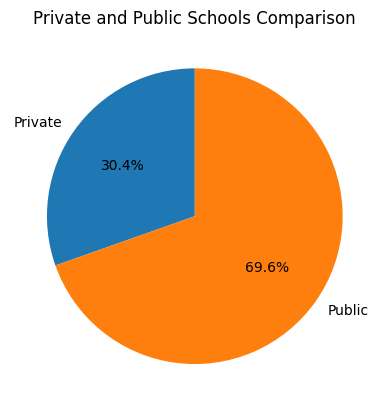

In [13]:
school_type()

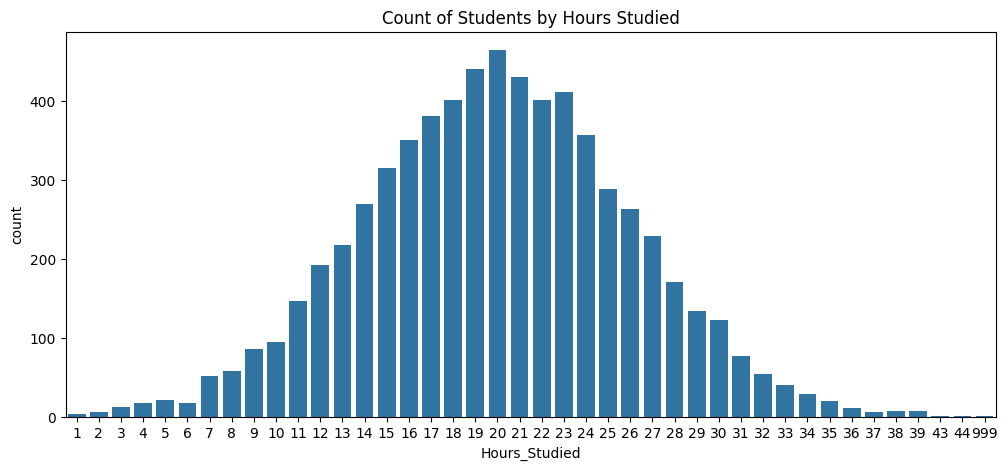

In [14]:
hours_studied_count()

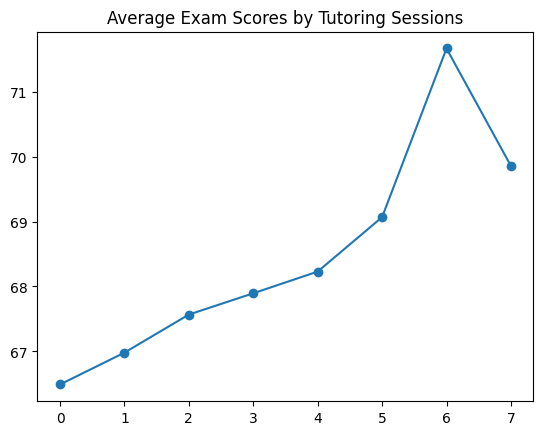

In [15]:
avg_scores_by_sleep()